# 10장. 가중치 초기화와 배치 정규화
- 가중치 초기화(Weights Initialization)
 - 어떤 목적으로 가중치 초기화를 진행하는지 이해하고 각 방법별 효과에 대해서 실습을 통해 확인합니다.

- Reuters 딥러닝 모델 예제
 - 로이터 기사 데이터를 분류하는 모델을 베이스라인으로 삼아서 오늘 배운 내용을 적용해봅니다.

- 배치 정규화(Batch Normalization)
 - 배치 정규화는 어떤 것이고 어떤 효과가 있는지 실습을 통해 알아봅니다.

## 가중치 초기화
- 신경망 성능에 큰 영향을 주는 요소 중 하나
- 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제 발생
- 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있음
- **모델의 활성화 값이 골고루 분포** 되는 것이 중요

### 함수 선언

In [ ]:
from tensorflow.keras import models, layers, optimizers

# 모델 생성 함수
def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import initializers, activations

## 이부분 matplotlib 업데이트 되면서 없어진 부분
sns.set_style('white')
# plt.style.use('seaborn-white')

# 결과 그래프 그리는 함수
def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    # 이부분을 이렇게 고쳐줘야 표가 나옵니다 -> numpy로 바꿔주면 계산속도 up
    plt.hist(input.numpy().flatten(), bins=20, range=(-1, 1))
    # plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

### 선형 함수 가중치 초기화

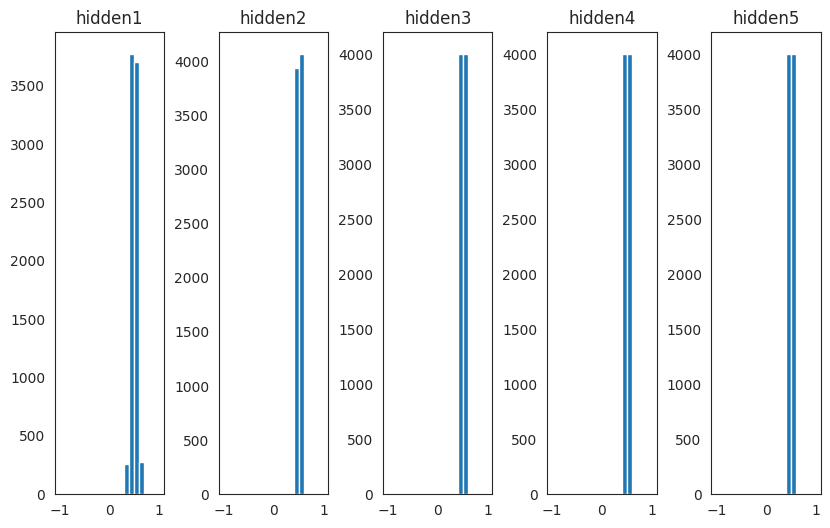

In [ ]:
########### 제로 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

- 각 레이어의 가중치 값 분포가 특정한 값으로만 몰림.
- 가중치 값이 0일 경우에는 오차역전파에서 모든 가중치 값이 똑같이 갱신되어 학습이 올바르게 진행될 수 없음

🪄 참고: 각 레이어의 값이 0.5에 몰려 있는 이유는 가중치 값이 활성화 함수로 사용한 sigmoid 함수를 통과하였기 때문입니다. (sigmoid(0)=0.5)

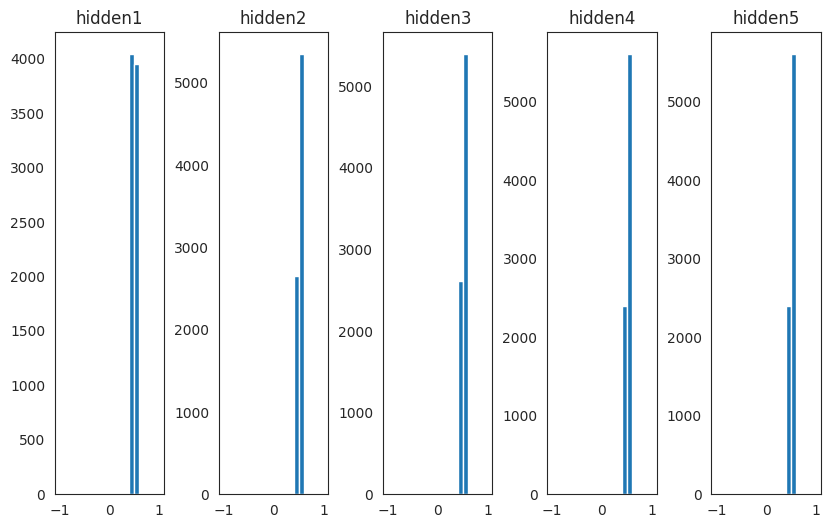

In [ ]:
####### 정규 분포 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

- 정규분포를 따르도록 무작위 값을 초기화하면 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있습니다.

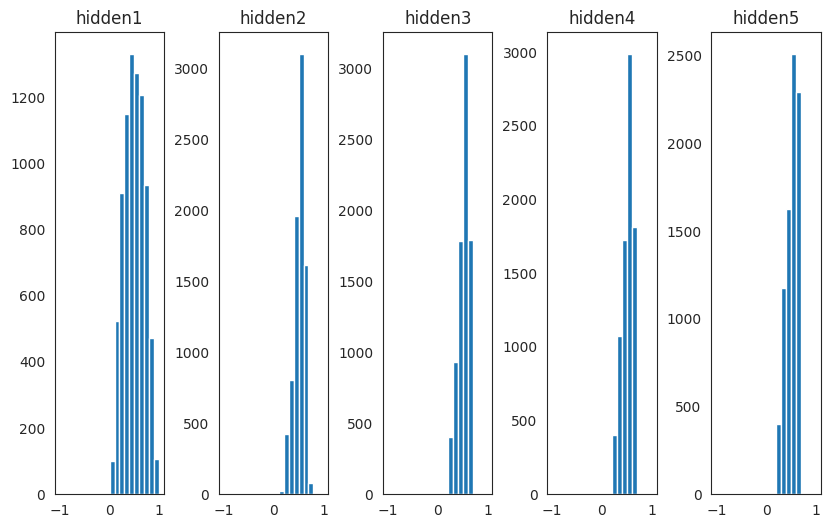

In [ ]:
########## 균일 분포 초기
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

- 균일분포를 따르는 무작위 값으로 초기화한 결과도 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 사라질 수 있습니다.

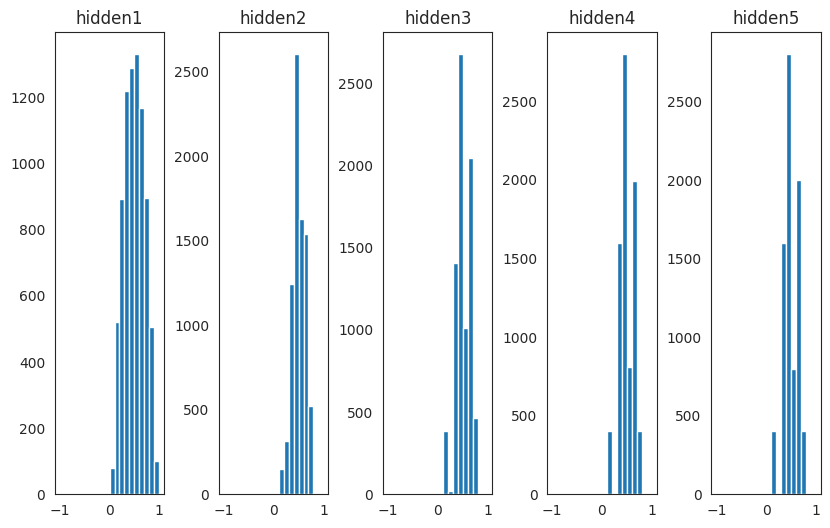

In [ ]:
############ Xavier(Glorot) 정규분포 초기화
# 은닉층의 노드의 수가 n이라면 표준편차가 1/루트n 인 분포로 초기화를 수행
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

- 비교적 분포로 고르고 레이어마다 표현이 잘 되고 있는 것을 알 수 있습니다. 즉, 더 많은 가중치에 역전파가 전달이 가능하게 됩니다.
- 일반적으로 **Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합 합니다.**

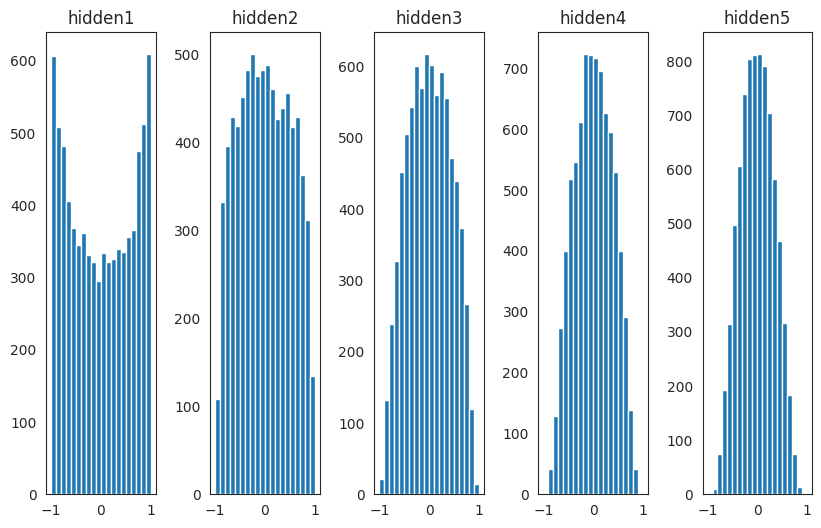

In [ ]:
############## Xavier(Glorot) 균일분포 초기화
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

- 활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있음

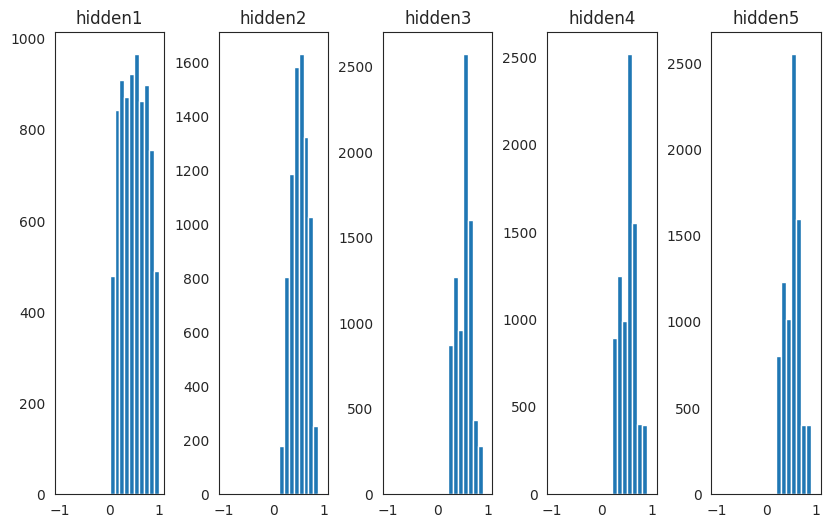

In [ ]:
########### He 정규 분포 초기
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

-  ReLU와 같은 비선형함수 일 때 더 적합하다고 알려진 초기화 방법

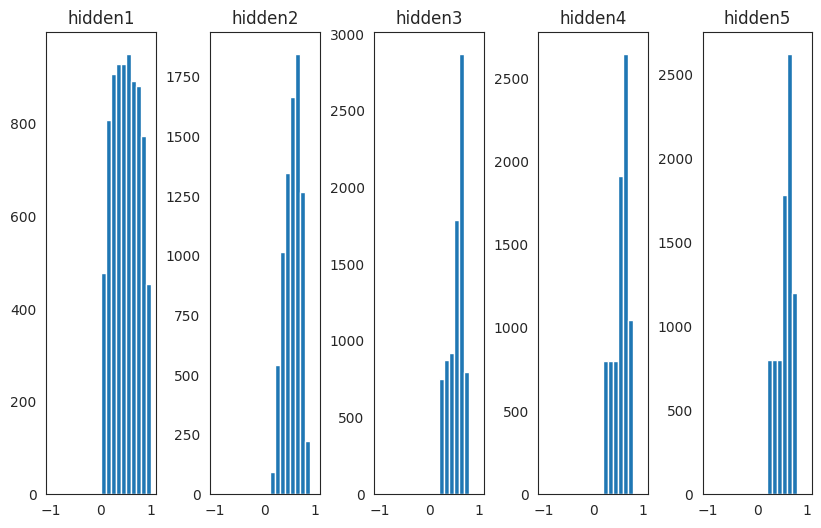

In [ ]:
################# He 균일분포 초기화
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

- 정규분포와 유사하게 가중치 값들이 잘 분포되어 있음을 알 수 있음

### 비선형 함수 가중치 초기화

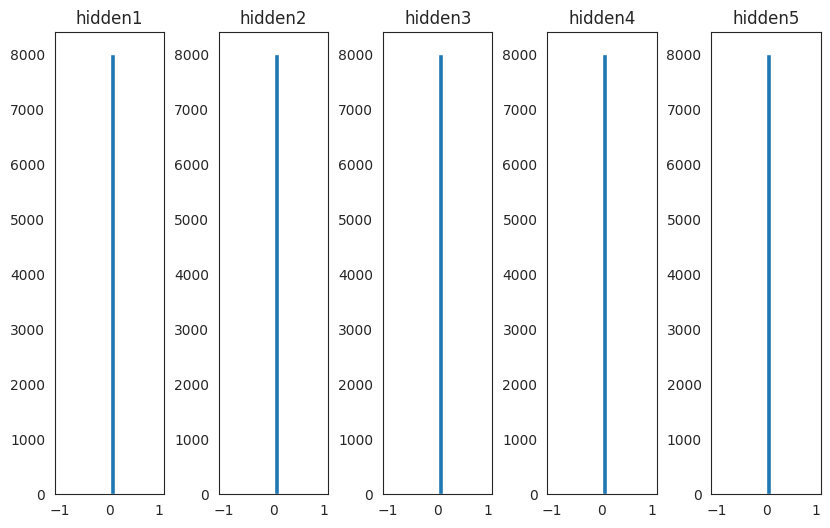

In [ ]:
############제로 초기화 --> 가중치 분포가 0에만 몰려 있음
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

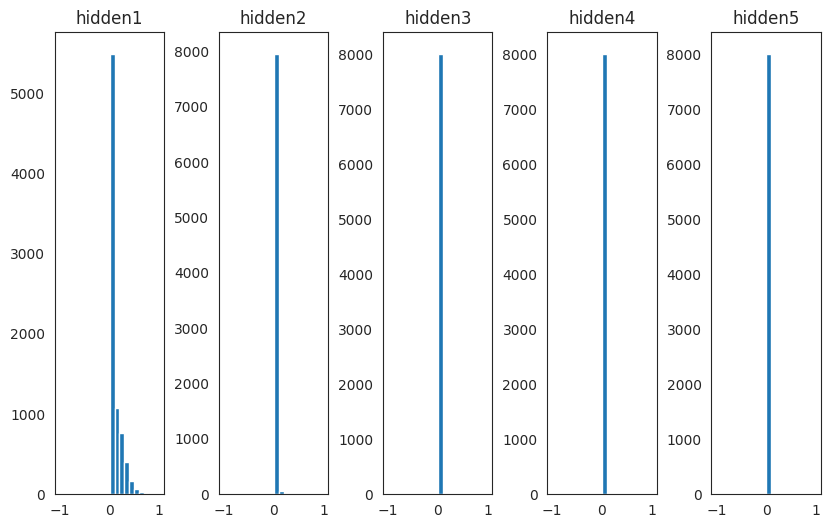

In [ ]:
############ 정규분포 초기화 -> 분포가 퍼져있는 것을 알 수 있습니다. 그러나 마찬가지로 hidden1 레이어를 제외하고는 0에 치우쳐 있는 문제가 있음
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

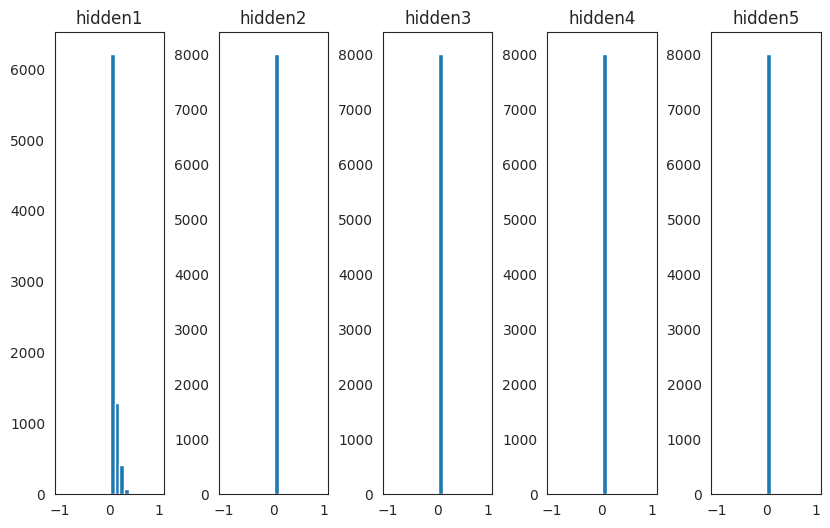

In [ ]:
############# 균일분포 초기화 -> 처음 레이어를 제외하고는 가중치 값이 0에 치우쳐 있는 것을 알 수 있음
model = build_model(activations.relu, initializers.RandomUniform())

show_layer(model)

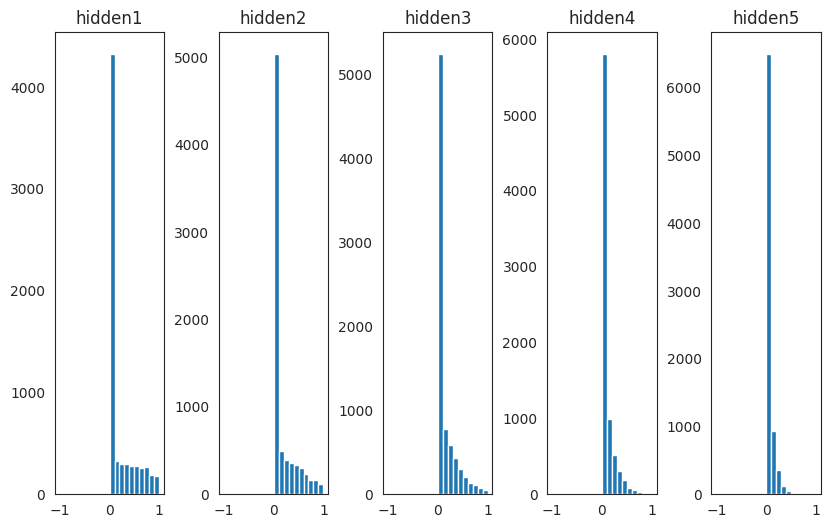

In [ ]:
############# Xavier(Glorot) 정규분포 초기화 ->  relu 특성상 0인 값이 많지만, 전체 레이어를 보더라도 어느정도 분포가 퍼져있는 것을 알 수 있음
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

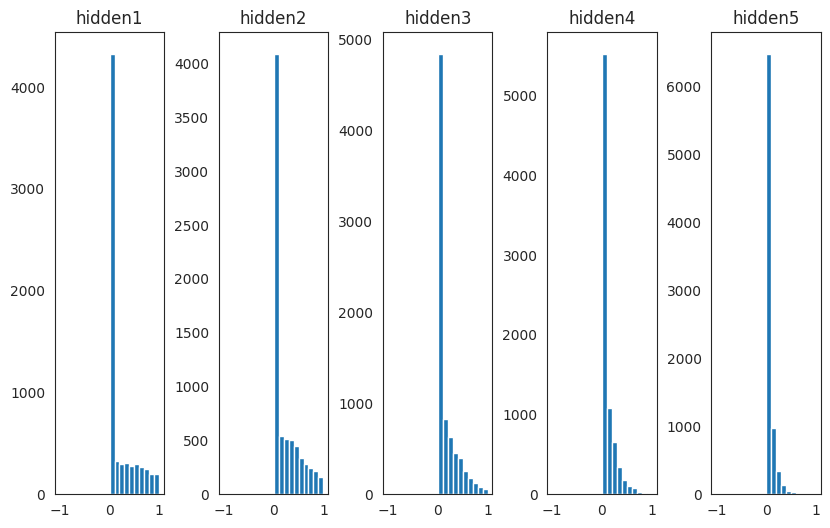

In [ ]:
################## Xavier(Glorot) 균일분포 초기화
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

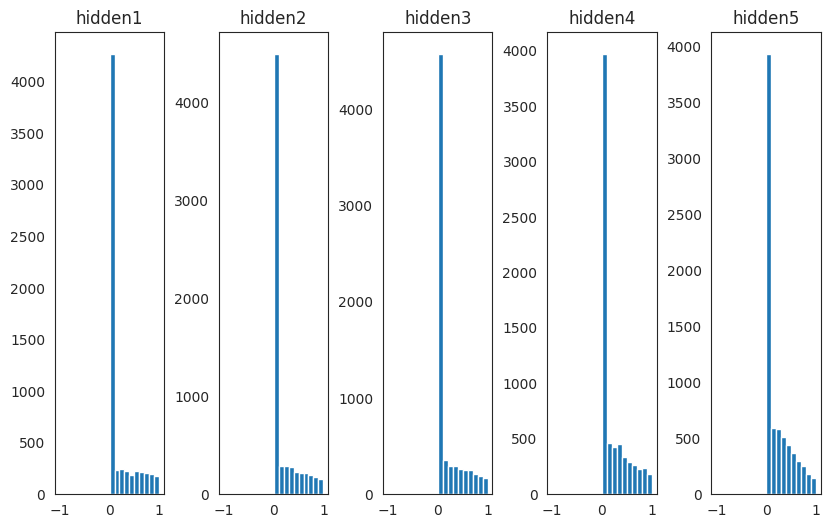

In [ ]:
################### He 정규분포 초기화 -> 비선형 함수에 더 적합하다고 알려져있으며, 시각화된 결과도 어느정도 분포가 고르게 형성되어 있음을 알 수 있
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

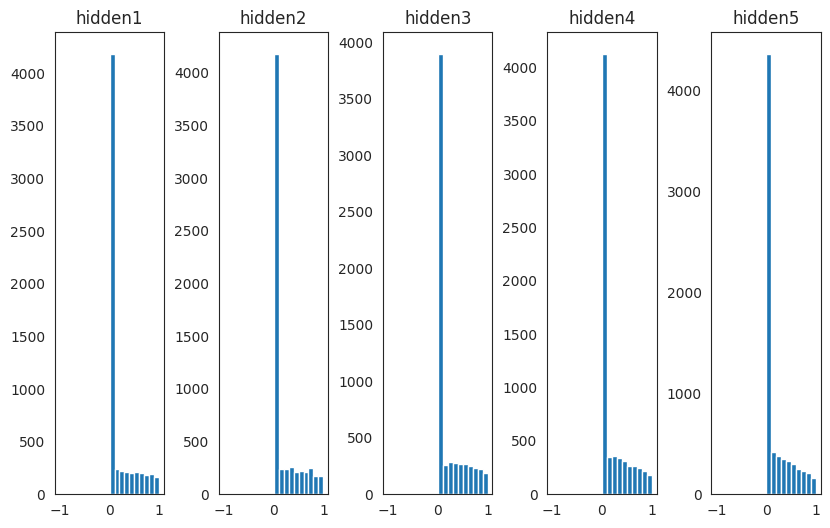

In [ ]:
############# He 균일분포 초기화
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

##  Reuters 딥러닝 모델 예제

### 데이터 로드 및 전처리

In [ ]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982
2246
46


In [ ]:
word_index = reuters.get_word_index()
# word_index

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [ ]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [ ]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [ ]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 모델 컴파일 및 학습

In [ ]:
model.compile(optimizer='rmsprop', # Adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,302,574 (4.97 MB)

 Trainable params: 1,302,574 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.4499 - loss: 2.7388 - val_accuracy: 0.6732 - val_loss: 1.4666
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7211 - loss: 1.2733 - val_accuracy: 0.7133 - val_loss: 1.2284
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7958 - loss: 0.9292 - val_accuracy: 0.7591 - val_loss: 1.0734
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8482 - loss: 0.7045 - val_accuracy: 0.7805 - val_loss: 0.9602
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8879 - loss: 0.5390 - val_accuracy: 0.7778 - val_loss: 0.9715
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9058 - loss: 0.4295 - val_accuracy: 0.7956 - val_loss: 0.8963
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9266 - loss: 0.3241 - val_accuracy: 0.8019 - val_loss: 0.8952
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9325 - loss: 0.2988 - val_accuracy: 0.8014 - 

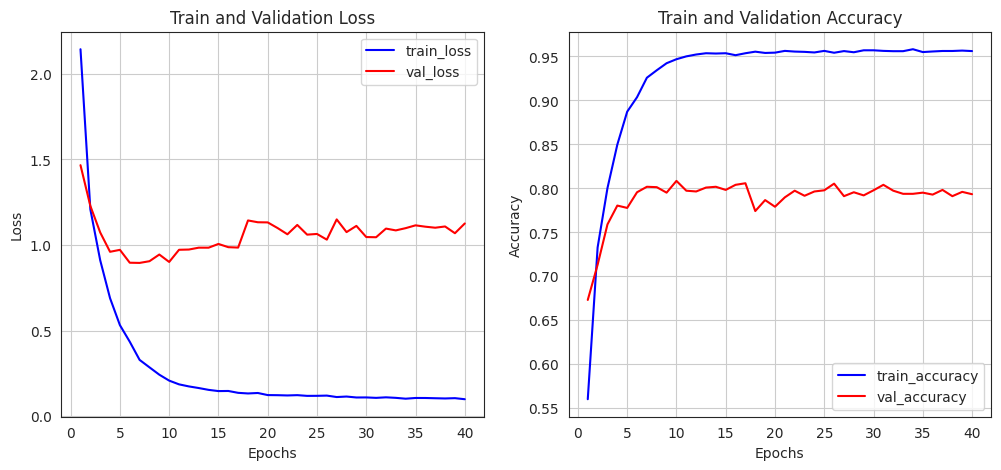

In [ ]:
###########결과 확인 시각화
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소하는 것을 알 수 있습니다. 모델은 과대적합된 상태인 것을 알 수 있습니다.

###가중치 초기화

In [ ]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [ ]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

- 제로 초기화

In [ ]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.1072 - loss: 3.8175 - val_accuracy: 0.0467 - val_loss: 3.7954
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0745 - loss: 3.7888 - val_accuracy: 0.3620 - val_loss: 3.7726
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3324 - loss: 3.7662 - val_accuracy: 0.3620 - val_loss: 3.7505
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3474 - loss: 3.7440 - val_accuracy: 0.3620 - val_loss: 3.7287
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3510 - loss: 3.7223 - val_accuracy: 0.3620 - val_loss: 3.7070
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3554 - loss: 3.6988 - val_accuracy: 0.3620 - val_loss: 3.6856
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3477 - loss: 3.6782 - val_accuracy: 0.3620 - val_loss: 3.6642
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3530 - loss: 3.6556 - val_accuracy: 0.3620 - 

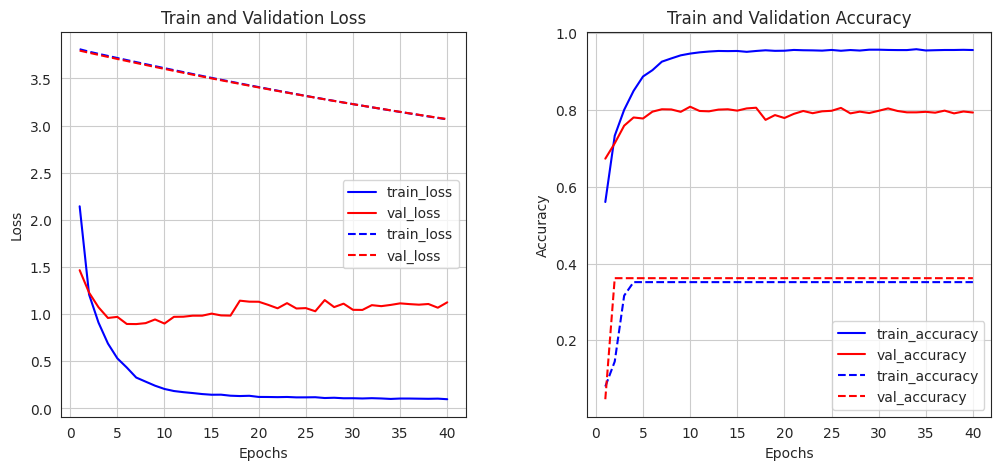

In [ ]:
diff_history(history, zero_history)

- 정규 분포 초기화

In [ ]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3674 - loss: 2.9815 - val_accuracy: 0.6131 - val_loss: 1.7099
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6450 - loss: 1.5499 - val_accuracy: 0.6848 - val_loss: 1.4074
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7196 - loss: 1.2236 - val_accuracy: 0.7137 - val_loss: 1.2468
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7802 - loss: 0.9869 - val_accuracy: 0.7391 - val_loss: 1.1295
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8185 - loss: 0.8079 - val_accuracy: 0.7493 - val_loss: 1.0634
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8384 - loss: 0.6941 - val_accuracy: 0.7645 - val_loss: 1.0076
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8681 - loss: 0.5873 - val_accuracy: 0.7654 - val_loss: 0.9869
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8929 - loss: 0.4727 - val_accuracy: 0.7818 - v

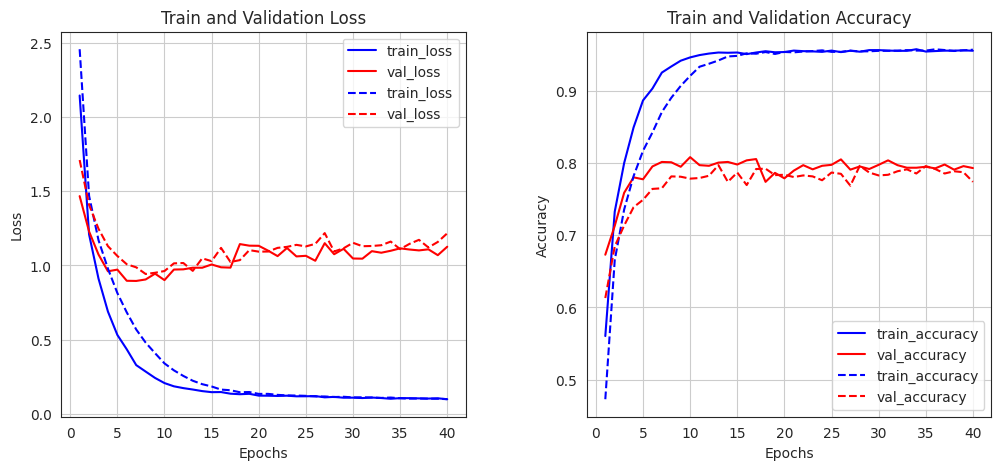

In [ ]:
diff_history(history, normal_history)

- Xavier(Glorot) 초기화

In [ ]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4221 - loss: 2.8714 - val_accuracy: 0.6768 - val_loss: 1.5055
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7132 - loss: 1.2966 - val_accuracy: 0.7271 - val_loss: 1.2382
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7842 - loss: 0.9696 - val_accuracy: 0.7591 - val_loss: 1.0698
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8386 - loss: 0.7221 - val_accuracy: 0.7734 - val_loss: 0.9919
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8735 - loss: 0.5874 - val_accuracy: 0.7649 - val_loss: 0.9923
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9022 - loss: 0.4710 - val_accuracy: 0.7894 - val_loss: 0.9012
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9244 - loss: 0.3583 - val_accuracy: 0.7885 - val_loss: 0.9092
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9364 - loss: 0.2875 - val_accuracy: 0.7979 - v

- He 초기화

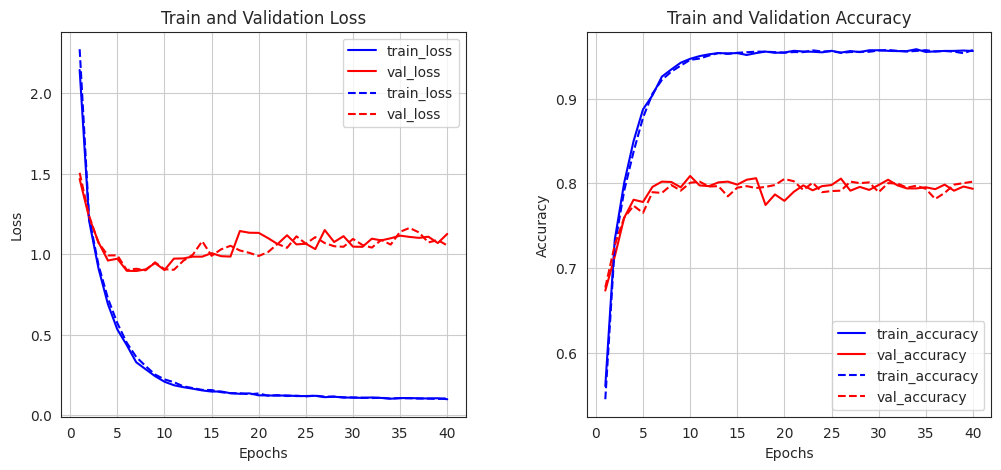

In [ ]:
diff_history(history, glorot_history)

In [ ]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4526 - loss: 2.7923 - val_accuracy: 0.6799 - val_loss: 1.4330
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7412 - loss: 1.1806 - val_accuracy: 0.7524 - val_loss: 1.1280
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8284 - loss: 0.8030 - val_accuracy: 0.7809 - val_loss: 0.9899
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8752 - loss: 0.5912 - val_accuracy: 0.7894 - val_loss: 0.9212
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9063 - loss: 0.4542 - val_accuracy: 0.7996 - val_loss: 0.8993
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9266 - loss: 0.3378 - val_accuracy: 0.8059 - val_loss: 0.8896
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9402 - loss: 0.2843 - val_accuracy: 0.7996 - val_loss: 0.9069
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9502 - loss: 0.2162 - val_accuracy: 0.7827 - v

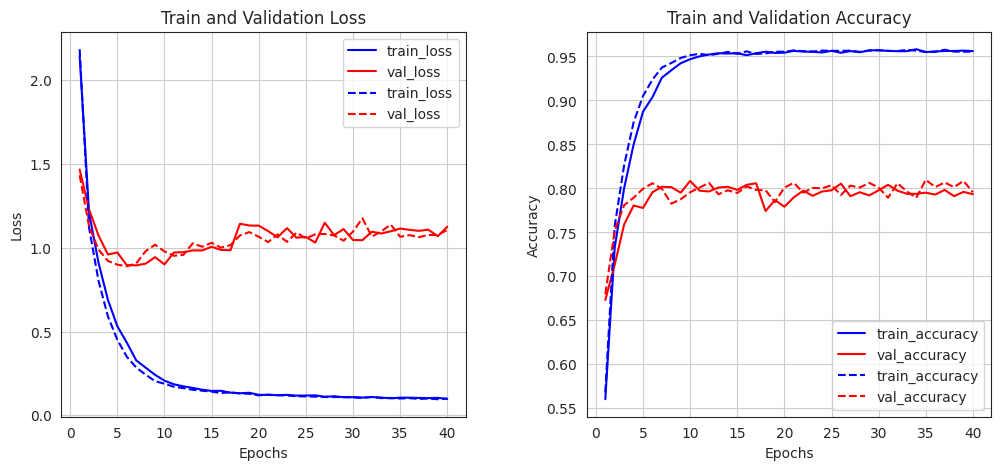

In [ ]:
diff_history(history, he_history)

## 배치 정규화
- **모델에 입력되는 샘플들을 균일하게 만드는 방법**
- 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것
- 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고, 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행
- **Dense 레이어 이후, 활성화 함수 이전에 활용**

### 모델 구성 및 컴파일

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization()) ### 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5218 - loss: 2.2669 - val_accuracy: 0.7458 - val_loss: 3.3428
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8748 - loss: 0.6497 - val_accuracy: 0.7382 - val_loss: 3.0882
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9345 - loss: 0.3421 - val_accuracy: 0.6910 - val_loss: 2.7399
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9475 - loss: 0.2241 - val_accuracy: 0.6883 - val_loss: 2.3909
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9588 - loss: 0.1622 - val_accuracy: 0.6950 - val_loss: 2.0447
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9580 - loss: 0.1429 - val_accuracy: 0.6750 - val_loss: 1.7971
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9595 - loss: 0.1186 - val_accuracy: 0.7030 - val_loss: 1.5424
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9600 - loss: 0.1082 - val_accuracy: 0.7231 - 

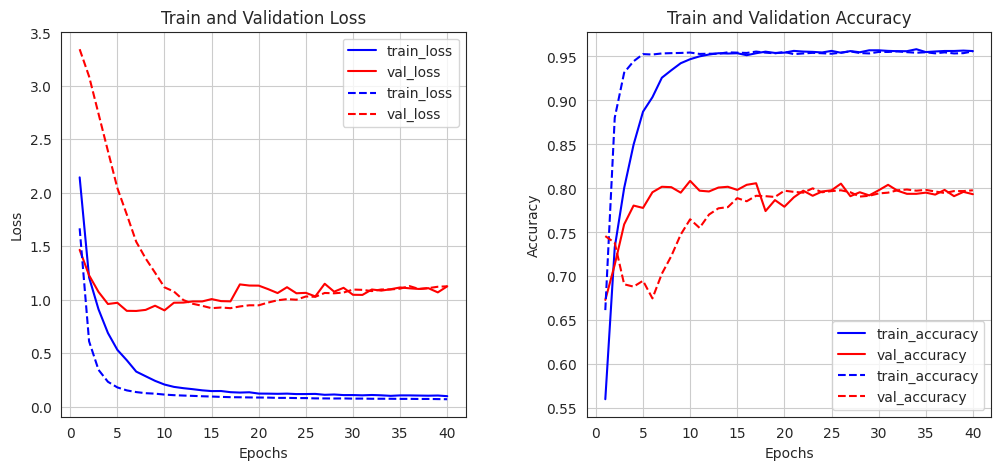

In [ ]:
diff_history(history, batch_norm_history)

In [ ]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5131 - loss: 2.4346 - val_accuracy: 0.7142 - val_loss: 3.3960
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9065 - loss: 0.5446 - val_accuracy: 0.7480 - val_loss: 3.2947
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9494 - loss: 0.2909 - val_accuracy: 0.7373 - val_loss: 3.1132
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9568 - loss: 0.2052 - val_accuracy: 0.7462 - val_loss: 2.9391
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9581 - loss: 0.1678 - val_accuracy: 0.7529 - val_loss: 2.7087
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9594 - loss: 0.1400 - val_accuracy: 0.7507 - val_loss: 2.4779
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9594 - loss: 0.1282 - val_accuracy: 0.7587 - val_loss: 2.2229
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9577 - loss: 0.1201 - val_accuracy: 0.7631 - 

## 종합문제

- 가중치 초기화 : 모델이 학습하기 전 가중치 값을 부여하는 것
- 작업 이유 : 적절한 가중치 값이 주어지지 않을 경우 가중치 중 활성화되는 부분이 매우 적거나 편향될 수 있기 때문에 필요

- 배치 정규화 : 들어온 데이터를 배치 단위로 평균이 0, 표준편차가 1인 데이터로 조정해주는 일
- 필요한 이유 : 학습 속도 증가와 과대적합을 방지할 수 있음